<img src="tp3.PNG">

In [2]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [3]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [4]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [5]:
class Simpson(object):
    def __init__(self, a, b, n, f): #initialiser les paramètres du classe
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)#les pts supports
        self.f = f
        self.n = n #nombre de subdivision

    def integrate(self,f):#calculer la somme ((b-a)/6*n)*[f(a)+2*sum(xi)+4*sum(mi)+f(b)]
        x=self.x #les points supports xi #x(0)=a-->x(n)=b
        y=f(x) #yi variable local y(o)=f(xo)-->y(n)
        h = float(x[1] - x[0])#pas h=(b-a)/2*n
        n = len(x) - 1#nombre subdivision
        if n % 2 == 1:#si le reste de la division =1 impaire
            n -= 1#☺nombre de sub ywali paire
        s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        #y[1:-1:2] min impaire loulla m0 lil 9bal likhrania 5ater 3anna deja y(n) par pas de 2== mi
        #calculer la somme
        #T(-1] dernier valeur dans le tableau)
        return h * s / 3.0
    def Graph(self,f,resolution=1001):#1000 points 1001 résolution juste pour dessiner f
        xl = self.x #pt support
        yl = f(xl) #yi
        xlist_fine=np.linspace(self.a, self.b, resolution)
        # pour le graph de la fonction f #intervalle ab subdiviser en 1000 poitns
        for i in range(self.n):#range intervalle 0 à n
            xx=np.linspace(xl[i], xl[i+1], resolution)
            #pour chaque subdivisuion  on doit dessiner polynome dnc on doit aussi le subdiviser
            m=(xl[i]+xl[i+1])/2#pt milieu
            aa=xl[i]#borne gauche
            bb=xl[i+1]#borne droite
            l0 = (xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1 = (xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2 = (xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            P = f(aa)*l0 + f(m)*l1 + f(bb)*l2#fonction dde polynome
            plt.plot(xx,P,'b')#dessiner polynome d'interpolation
            plt.plot(m,f(m),"r*")
        yflist_fine = f(xlist_fine)#fontion f
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.plot(xl, yl,'bo')#point support en bleu rond
        
        plt.ylabel('f(x)')
        plt.title('Simpson')
        

In [6]:
class Milieu(object): 
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        h = float(x[1] - x[0])
        s=0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s
       
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl=f(xl);
        xlist_fine=np.linspace(self.a, self.b, resolution)        
        for i in range(self.n):            
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] 
            y_rect = [0  , f(m), f(m)  , 0 , 0 ] 
            plt.plot(x_rect, y_rect,"r")
            plt.plot(m,f(m),"b*")
            
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine,'g')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Milieu')
        


In [7]:

Sel=widgets.Dropdown(
    options=[('Méthode des réctangles gauches', 1), ('Méthode des Trapèzes', 2),('Méthodes des Points Milieux', 3) ,
             ('Méthodes de Simpson', 4)],
    value=1,
    description='Méthode:',
)
text_func = widgets.Text(value='cos(x)', description='Fonction', continuous_update=False)
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='1', description='a', continuous_update=False)
text_b = widgets.Text(value='2', description='b', continuous_update=False)
text_n = widgets.Text(value='4', description='n', continuous_update=False)
text_int = widgets.Text(value='', description='I_n', continuous_update=True)
button = widgets.Button(description="Calculer",
                        button_style = 'danger',
                       icon = 'check'
                       )

def sim(b):
    dic={1:RectangleG,2:Trapezoidal,3:Milieu,4:Simpson}
    s=Sel.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value



def update_a(change):
    change.new    
def update_b(change):
    change.new
def update_n(change):
    change.new
def update_f(change):
    change.new

button.on_click(sim)
# connect callbacks and traits

text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')



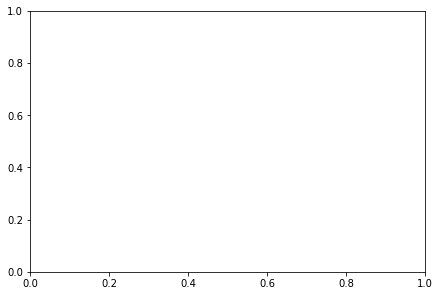

In [8]:
output = widgets.Output()

with output:
    fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))     

#fig.canvas.toolbar_position = 'bottom'

In [10]:

def make_boxes():
    
    vbox1 = widgets.VBox([Sel, text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([ output])
    return vbox1, vbox2
box_layout = widgets.Layout(
      border='solid 2px ',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px', 
                    
    
)

        
vbox1, vbox2 = make_boxes()
 
vbox1.layout = box_layout
vbox2.layout = box_layout

widgets.HBox([vbox1, vbox2])
